### Laterite Mobile Money Data Cleaning

#### Dataset Summary

Laterite_MobileMoney_data contains information about financial accounts types such as Mobile Money, Bank Accounts, VSLA Accounts, and SACCO Accounts held by individuals in various districts, both rural and urban, across multiple points in time. Each row represents an individual and their account information, with most rows having information on multiple accounts. The dataset includes information on account types, weights,  and demographic information districts, urban/rural classification, gender, age, household size, highest grade completed, account cancellations, preferences for cash, trust in mobile money providers, telco usage, account terms, agent trust, loans, network issues, fee clearance, transaction failures, agents' float, complaints, resolution status, data collection, fraud victimization, and start and end times for data collection. Before cleaning, the dataset had 136 feautues (with repeating one) and 1205 oberservations(rows).


#### Data Cleaning

Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies from a dataset. This process is essential for ensuring the quality and reliability of data used in analysis, modeling, and decision-making. It consumes most of the in data analysis. Research shows that more than 60% of the time spend on this part **CrowdFlower. (2016). The Data Scientist Report**

#### I will start this process by importing necessary libraries

In [27]:
!pip install missingno

In [34]:
! pip install pingouin

     ------------------------------------ 198.6/198.6 kB 446.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7034 sha256=14157d875391f3d0cb975e5c46114c14e17db06f50d5ec9896b663c7aab7c843
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e0\3b\9c\d55ff5bc6cfbe70537c4731a22f2ee2462c2e5010b56ac9726
Successfully built littleutils


In [35]:
# importing necessary modules
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import pingouin as pg
laterite=pd.read_csv("laterite_mobilemoney_data.csv")
# Making all columns visible
pd.set_option('display.max_columns', None)
# Inspection of the first 5 rows of the dataset
laterite.head()

,hhid,account_type1,weight1,district1,urban1,gender1,age1,hh_members1,highest_grade_completed1,mm_account_cancelled1,prefer_cash1,mm_trust1,mm_account_telco1,mm_account_telco_main1,terms1,agent_trust1,mm_loan1,network_issues1,fees_clear1,trans_fail1,agents_float1,copy_terms1,complaints1,resolved1,data_collected1,fraud_victim1,start_time1,end_time1,account_type2,weight2,district2,urban2,gender2,age2,hh_members2,highest_grade_completed2,mm_account_cancelled2,prefer_cash2,mm_trust2,mm_account_telco2,mm_account_telco_main2,terms2,agent_trust2,mm_loan2,network_issues2,fees_clear2,trans_fail2,agents_float2,copy_terms2,complaints2,resolved2,data_collected2,fraud_victim2,start_time2,end_time2,account_type3,weight3,district3,urban3,gender3,age3,hh_members3,highest_grade_completed3,mm_account_cancelled3,prefer_cash3,mm_trust3,mm_account_telco3,mm_account_telco_main3,terms3,agent_trust3,mm_loan3,network_issues3,fees_clear3,trans_fail3,agents_float3,copy_terms3,complaints3,resolved3,data_collected3,fraud_victim3,start_time3,end_time3,account_type4,weight4,district4,urban4,gender4,age4,hh_members4,highest_grade_completed4,mm_account_cancelled4,prefer_cash4,mm_trust4,mm_account_telco4,mm_account_telco_main4,terms4,agent_trust4,mm_loan4,network_issues4,fees_clear4,trans_fail4,agents_float4,copy_terms4,complaints4,resolved4,data_collected4,fraud_victim4,start_time4,end_time4,account_type5,weight5,district5,urban5,gender5,age5,hh_members5,highest_grade_completed5,mm_account_cancelled5,prefer_cash5,mm_trust5,mm_account_telco5,mm_account_telco_main5,terms5,agent_trust5,mm_loan5,network_issues5,fees_clear5,trans_fail5,agents_float5,copy_terms5,complaints5,resolved5,data_collected5,fraud_victim5,start_time5,end_time5
0,1001,Mobile Money,145.94444,District_A,Urban,male,32,1,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,10/28/2019 09:05,10/28/2019 10:38,Bank Account,145.94444,District_A,Urban,male,32.0,1.0,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,10/28/2019 10:42,10/28/2019 11:43,VSLA Account,145.94444,District_A,Urban,male,32.0,1.0,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,10/28/2019 11:47,10/28/2019 12:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1002,SACCO Account,122.90667,District_B,Rural,male,32,4,primary 3,yes,yes,no,NaN,NaN,NaN,no,NaN,yes,yes,yes,no,no,no,NaN,no,no,10/28/2019 13:02,10/28/2019 13:56,VSLA Account,122.90667,District_B,Rural,male,32.0,4.0,primary 3,yes,yes,no,NaN,NaN,NaN,no,NaN,yes,yes,yes,no,no,no,NaN,no,no,10/28/2019 14:01,10/28/2019 14:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,Mobile Money,760.46191,District_A,Urban,male,30,8,secondary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,yes,yes,no,yes,yes,yes,no,10/28/2019 15:03,10/28/2019 16:15,Bank Account,760.46191,District_A,Urban,male,30.0,8.0,secondary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,yes,yes,no,yes,yes,yes,no,10/28/2019 13:04,10/28/2019 14:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1004,Mobile Money,433.96402,District_A,Rural,male,68,4,primary 6,no,yes,no,Company_A,NaN,no,no,NaN,no,no,no,no,no,yes,NaN,no,no,10/28/2019 15:17,10/28/2019 16:35,Bank Account,433.96402,District_A,Ru

### 1. a) Reshaping the dataset so that each account will have one abservation

In [2]:

# specify the id variables and melt the account type columns
id_vars = ['hhid', 'weight1', 'district1', 'urban1', 'gender1', 'age1', 'hh_members1',
           'highest_grade_completed1', 'mm_account_cancelled1', 'prefer_cash1',
           'mm_trust1', 'mm_account_telco1', 'mm_account_telco_main1', 'terms1',
           'agent_trust1', 'mm_loan1', 'network_issues1', 'fees_clear1', 'trans_fail1',
           'agents_float1', 'copy_terms1', 'complaints1', 'resolved1', 'data_collected1',
           'fraud_victim1', 'start_time1', 'end_time1']
value_vars = ['account_type1', 'account_type2', 'account_type3', 'account_type4', 'account_type5']

reshaped = laterite.melt(id_vars=id_vars, value_vars=value_vars, var_name='account_number', value_name='account_type')
reshaped.tail()

,hhid,weight1,district1,urban1,gender1,age1,hh_members1,highest_grade_completed1,mm_account_cancelled1,prefer_cash1,mm_trust1,mm_account_telco1,mm_account_telco_main1,terms1,agent_trust1,mm_loan1,network_issues1,fees_clear1,trans_fail1,agents_float1,copy_terms1,complaints1,resolved1,data_collected1,fraud_victim1,start_time1,end_time1,account_number,account_type
6020,2201,406.14182,District_B,Rural,male,38,7,primary 3,no,yes,no,Company_A Company_B,Company_B,yes,no,NaN,yes,no,no,yes,no,yes,yes,yes,no,11/07/2019 09:59,11/07/2019 10:57,account_type5,NaN
6021,2202,172.01518,District_C,Rural,male,35,4,primary 6,no,yes,no,Company_B,NaN,yes,NaN,NaN,no,yes,no,no,no,yes,NaN,no,no,10/28/2019 09:37,10/28/2019 11:11,account_type5,NaN
6022,2203,103.26880,District_C,Rural,female,18,7,primary 6,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2019 10:43,11/04/2019 11:48,account_type5,NaN
6023,2204,495.77039,District_C,Rural,female,58,6,primary 6,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/04/2019 13:52,11/04/2019 14:59,account_type5,NaN
6024,2205,666.83020,District_A,Rural,female,23,7,secondary 6,no,yes,no,Company_A Company_B,Company_A,no,no,no,yes,yes,yes,no,yes,yes,yes,no,yes,11/05/2019 14:59,11/05/2019 16:06,account_type5,NaN


### b) Droping the observation without account type

In [3]:
# drop any rows with missing account type values
reshaped.dropna(subset=['account_type'], inplace=True)

# reset the index
reshaped.reset_index(drop=True, inplace=True)
# Inspecting the last 5 rows of dataset
reshaped.tail()

,hhid,weight1,district1,urban1,gender1,age1,hh_members1,highest_grade_completed1,mm_account_cancelled1,prefer_cash1,mm_trust1,mm_account_telco1,mm_account_telco_main1,terms1,agent_trust1,mm_loan1,network_issues1,fees_clear1,trans_fail1,agents_float1,copy_terms1,complaints1,resolved1,data_collected1,fraud_victim1,start_time1,end_time1,account_number,account_type
2437,2165,1191.01200,District_C,Rural,female,37,4,primary 6,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/06/2019 14:34,11/06/2019 15:59,account_type4,VSLA Account
2438,2191,233.16049,District_A,Rural,male,31,4,primary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,no,yes,no,no,NaN,no,no,11/04/2019 15:27,11/04/2019 16:35,account_type4,VSLA Account
2439,2205,666.83020,District_A,Rural,female,23,7,secondary 6,no,yes,no,Company_A Company_B,Company_A,no,no,no,yes,yes,yes,no,yes,yes,yes,no,yes,11/05/2019 14:59,11/05/2019 16:06,account_type4,VSLA Account
2440,1881,137.83900,District_A,Rural,male,32,4,primary 6,no,yes,no,Company_A Company_B Company_C,Company_B,yes,no,NaN,yes,yes,yes,yes,no,yes,NaN,yes,no,11/05/2019 13:24,11/05/2019 14:38,account_type5,VSLA Account
2441,2070,371.77594,District_B,Rural,male,41,6,secondary 5,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,yes,yes,no,no,NaN,no,no,11/07/2019 13:36,11/07/2019 14:56,account_type5,VSLA Account


### c) Saving dataset as laterite_mobilemoney_data_long


In [4]:
reshaped.to_csv("laterite_mobilemoney_data_long.dta.csv")

### 2. Using the reshaped dataset, create two dummy variables for whether each participant

#### a) Financially excluded

In [5]:
import numpy as np
# Create dummy variable for financial exclusion
reshaped['financially_excluded'] = np.where(reshaped['account_type'].isna(), 1, 0)

#### b) Digitally financially included

In [6]:
# Create dummy variable for digital financial inclusion
reshaped['digitally_fi'] = np.where(reshaped['account_type'].isin(['Mobile Money', 'Online Bank']), 1, 0)

#### c) Overall rates of financial exclusion and digital financial

In [7]:
# Calculate overall rates of financial exclusion and digital financial inclusion
overall_financial_exclusion_rate = reshaped['financially_excluded'].mean()
overall_digital_fi_rate = reshaped['digitally_fi'].mean()

print("Overall rate of financial exclusion: {:.2%}".format(overall_financial_exclusion_rate))
print("Overall rate of digital financial inclusion: {:.2%}".format(overall_digital_fi_rate))


Overall rate of financial exclusion: 0.00%
Overall rate of digital financial inclusion: 33.87%


In [8]:
# Inspecting the dataset
reshaped.tail(3)

,hhid,weight1,district1,urban1,gender1,age1,hh_members1,highest_grade_completed1,mm_account_cancelled1,prefer_cash1,mm_trust1,mm_account_telco1,mm_account_telco_main1,terms1,agent_trust1,mm_loan1,network_issues1,fees_clear1,trans_fail1,agents_float1,copy_terms1,complaints1,resolved1,data_collected1,fraud_victim1,start_time1,end_time1,account_number,account_type,financially_excluded,digitally_fi
2439,2205,666.83020,District_A,Rural,female,23,7,secondary 6,no,yes,no,Company_A Company_B,Company_A,no,no,no,yes,yes,yes,no,yes,yes,yes,no,yes,11/05/2019 14:59,11/05/2019 16:06,account_type4,VSLA Account,0,0
2440,1881,137.83900,District_A,Rural,male,32,4,primary 6,no,yes,no,Company_A Company_B Company_C,Company_B,yes,no,NaN,yes,yes,yes,yes,no,yes,NaN,yes,no,11/05/2019 13:24,11/05/2019 14:38,account_type5,VSLA Account,0,0
2441,2070,371.77594,District_B,Rural,male,41,6,secondary 5,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,yes,yes,no,no,NaN,no,no,11/07/2019 13:36,11/07/2019 14:56,account_type5,VSLA Account,0,0


# 3. Using the start and end times of the surveys, 

#### a) Calculate the duration of each survey (note: start_time and end_time are both string variables and will need to be converted to numeric variables). 

In [9]:
import pandas as pd

import datetime
df=reshaped.copy()

# Convert start_time1 and end_time1 to datetime objects
reshaped["start_time1"] = pd.to_datetime(reshaped["start_time1"])
reshaped["end_time1"] = pd.to_datetime(reshaped["end_time1"])

# Calculate the duration of the first survey
reshaped["survey_duration(min)"] =(reshaped["end_time1"] - reshaped["start_time1"]).dt.total_seconds()/60

In [10]:
reshaped.head()

,hhid,weight1,district1,urban1,gender1,age1,hh_members1,highest_grade_completed1,mm_account_cancelled1,prefer_cash1,mm_trust1,mm_account_telco1,mm_account_telco_main1,terms1,agent_trust1,mm_loan1,network_issues1,fees_clear1,trans_fail1,agents_float1,copy_terms1,complaints1,resolved1,data_collected1,fraud_victim1,start_time1,end_time1,account_number,account_type,financially_excluded,digitally_fi,survey_duration(min)
0,1001,145.94444,District_A,Urban,male,32,1,primary 6,no,yes,no,Company_A Company_B,Company_A,yes,no,NaN,yes,yes,no,yes,no,yes,NaN,yes,no,2019-10-28 09:05:00,2019-10-28 10:38:00,account_type1,Mobile Money,0,1,93.0
1,1002,122.90667,District_B,Rural,male,32,4,primary 3,yes,yes,no,NaN,NaN,NaN,no,NaN,yes,yes,yes,no,no,no,NaN,no,no,2019-10-28 13:02:00,2019-10-28 13:56:00,account_type1,SACCO Account,0,0,54.0
2,1003,760.46191,District_A,Urban,male,30,8,secondary 6,no,yes,no,Company_A,NaN,yes,no,NaN,no,yes,yes,yes,no,yes,yes,yes,no,2019-10-28 15:03:00,2019-10-28 16:15:00,account_type1,Mobile Money,0,1,72.0
3,1004,433.96402,District_A,Rural,male,68,4,primary 6,no,yes,no,Company_A,NaN,no,no,NaN,no,no,no,no,no,yes,NaN,no,no,2019-10-28 15:17:00,2019-10-28 16:35:00,account_type1,Mobile Money,0,1,78.0
4,1005,303.04395,District_C,Rural,female,28,2,primary 6,no,yes,no,Company_B,NaN,yes,no,no,yes,yes,yes,yes,no,yes,NaN,no,no,2019-10-28 16:25:00,2019-10-28 17:21:00,account_type1,Mobile Money,0,1,56.0


#### b) Median survey duration

In [11]:
reshaped["survey_duration(min)"].median()

71.0

#### c) Way of identifying outliers and the steps you would take to investigate or deal with them.


1. Calculate statistical measures: Statistical measures such as mean, median, and standard deviation can be used to identify outliers. Observations that are far from the mean or median by several standard deviations can be considered outliers. 
Also, some machine learning algorithms that can help to identify and remove the outliers

In [12]:
reshaped["survey_duration(min)"].describe()

count    2442.000000
mean       77.499181
std        58.764950
min        40.000000
25%        63.000000
50%        71.000000
75%        80.000000
max      1391.000000
Name: survey_duration(min), dtype: float64

Using describe, it is clear that the minimum duration is 40 mins, mean is 77.499 mins and maximum is 1391 mins. Using 1391 mins collecting data doesn't make a sense for [This is outlier and it might due to different reason including typing error].

2. Visualizing the data: Plotting the data using boxplots can help identify outliers visually. Outliers will appear as points that are distant from the main cluster of data points on boxplots.

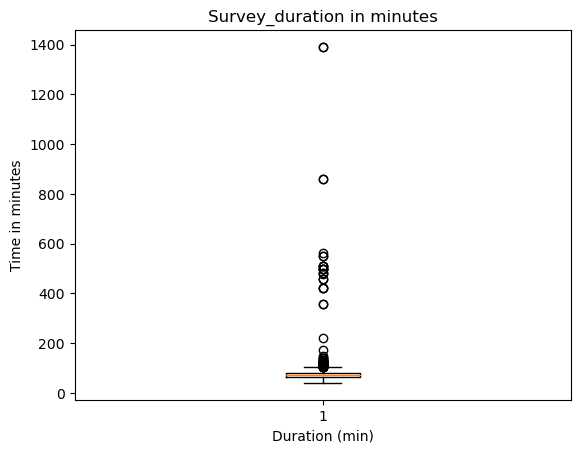

In [13]:
fig, ax = plt.subplots()
ax.boxplot(reshaped["survey_duration(min)"])
# Set the axis labels and title
ax.set_xlabel('Duration (min)')
ax.set_ylabel('Time in minutes')
ax.set_title('Survey_duration in minutes')
# Display the plot
plt.show()

##### This is an example on how you can remove outliers in your dataset

Interquartile Range (IQR) method: This method involves calculating the IQR for the dataset and removing any data points that fall outside a certain range (usually 1.5 times the IQR). This method is a variation of the IQR method and involves removing any data points that fall outside of the range of (Q1 - 1.5IQR) to (Q3 + 1.5IQR), where Q1 and Q3 are the first and third quartiles of the data
Z-score method: This method involves calculating the z-score for each data point and removing any data points that have a z-score greater than a certain threshold (usually 3 or -3).  

In [14]:
# Calculate the IQR and upper/lower bounds for survey_duration(min)
q1 = reshaped["survey_duration(min)"].quantile(0.25)
q3 = reshaped["survey_duration(min)"].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers from survey_duration(min)
reshaped = reshaped[(reshaped["survey_duration(min)"] >= lower_bound) 
                                             & 
                    (reshaped["survey_duration(min)"] <= upper_bound)]

###### Using Describe to calculate the statistical measures after removing outliers

In [15]:
reshaped["survey_duration(min)"].describe()

count    2355.000000
mean       71.221656
std        11.504354
min        40.000000
25%        63.000000
50%        70.000000
75%        79.000000
max       105.000000
Name: survey_duration(min), dtype: float64

#### The Boxplot after removing the outliers

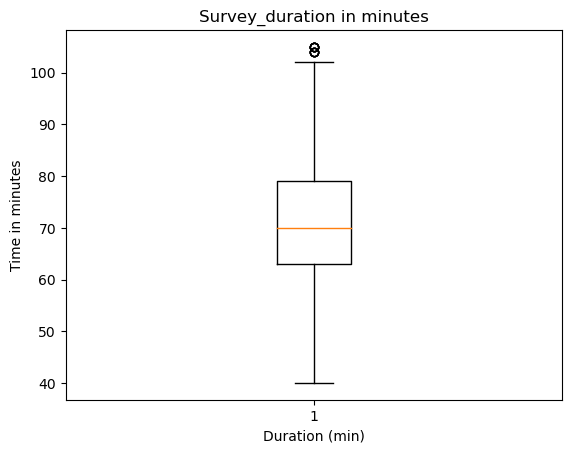

In [16]:
fig, ax = plt.subplots()
ax.boxplot(reshaped["survey_duration(min)"])
# Set the axis labels and title
ax.set_xlabel('Duration (min)')
ax.set_ylabel('Time in minutes')
ax.set_title('Survey_duration in minutes')
# Display the plot
plt.show()

### 4. There project lead wants to ensure that the variables in the final dataset match the expectations the team had when the survey instrument was deployed for data collection

#### a) The variables are already labelled

#### b) Convert all sure all yes/no values from string to numeric type float (keep both the intrinsic value and label; 1 == Yes, 0 == No)

In [17]:
# Convert yes/no values to float
for col in reshaped.columns:
    if "yes" in reshaped[col].unique() and "no" in reshaped[col].unique():
        reshaped[col] = reshaped[col].replace({"yes": 1.0, "no": 0.0})

C:\Users\user\AppData\Local\Temp\ipykernel_12356\2308934676.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "yes" in reshaped[col].unique() and "no" in reshaped[col].unique():


#### c) Produce a file in .xlsx format showing (in separate columns) all variable names, labels, variable types as well as the answer choices.

In [18]:
reshaped.to_excel("Laterite_mobile_data.xlsx")

In [19]:
reshaped.head()

,hhid,weight1,district1,urban1,gender1,age1,hh_members1,highest_grade_completed1,mm_account_cancelled1,prefer_cash1,mm_trust1,mm_account_telco1,mm_account_telco_main1,terms1,agent_trust1,mm_loan1,network_issues1,fees_clear1,trans_fail1,agents_float1,copy_terms1,complaints1,resolved1,data_collected1,fraud_victim1,start_time1,end_time1,account_number,account_type,financially_excluded,digitally_fi,survey_duration(min)
0,1001,145.94444,District_A,Urban,male,32,1,primary 6,0.0,1.0,0.0,Company_A Company_B,Company_A,1.0,0.0,NaN,1.0,1.0,0.0,1.0,0.0,1.0,NaN,1.0,0.0,2019-10-28 09:05:00,2019-10-28 10:38:00,account_type1,Mobile Money,0,1,93.0
1,1002,122.90667,District_B,Rural,male,32,4,primary 3,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,2019-10-28 13:02:00,2019-10-28 13:56:00,account_type1,SACCO Account,0,0,54.0
2,1003,760.46191,District_A,Urban,male,30,8,secondary 6,0.0,1.0,0.0,Company_A,NaN,1.0,0.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2019-10-28 15:03:00,2019-10-28 16:15:00,account_type1,Mobile Money,0,1,72.0
3,1004,433.96402,District_A,Rural,male,68,4,primary 6,0.0,1.0,0.0,Company_A,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,2019-10-28 15:17:00,2019-10-28 16:35:00,account_type1,Mobile Money,0,1,78.0
4,1005,303.04395,District_C,Rural,female,28,2,primary 6,0.0,1.0,0.0,Company_B,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,0.0,0.0,2019-10-28 16:25:00,2019-10-28 17:21:00,account_type1,Mobile Money,0,1,56.0


##### Showing the number of Missing Values under each column

In [20]:
reshaped.isnull().sum()

hhid                           0
weight1                        0
district1                      0
urban1                         0
gender1                        0
age1                           0
hh_members1                    0
highest_grade_completed1     202
mm_account_cancelled1          0
prefer_cash1                  45
mm_trust1                    127
mm_account_telco1            455
mm_account_telco_main1      1378
terms1                       564
agent_trust1                 775
mm_loan1                    1739
network_issues1              284
fees_clear1                  279
trans_fail1                  279
agents_float1                321
copy_terms1                  328
complaints1                  284
resolved1                   1799
data_collected1              284
fraud_victim1                279
start_time1                    0
end_time1                      0
account_number                 0
account_type                   0
financially_excluded           0
digitally_

In [25]:
reshaped.shape

(2355, 32)

In [23]:
reshaped.isnull().sum()

hhid                        0
weight1                     0
district1                   0
urban1                      0
gender1                     0
age1                        0
hh_members1                 0
highest_grade_completed1    0
mm_account_cancelled1       0
prefer_cash1                0
mm_trust1                   0
mm_account_telco1           0
mm_account_telco_main1      0
terms1                      0
agent_trust1                0
mm_loan1                    4
network_issues1             0
fees_clear1                 0
trans_fail1                 0
agents_float1               0
copy_terms1                 0
complaints1                 0
resolved1                   2
data_collected1             0
fraud_victim1               0
start_time1                 0
end_time1                   0
account_number              0
account_type                0
financially_excluded        0
digitally_fi                0
survey_duration(min)        0
dtype: int64

<Axes: >

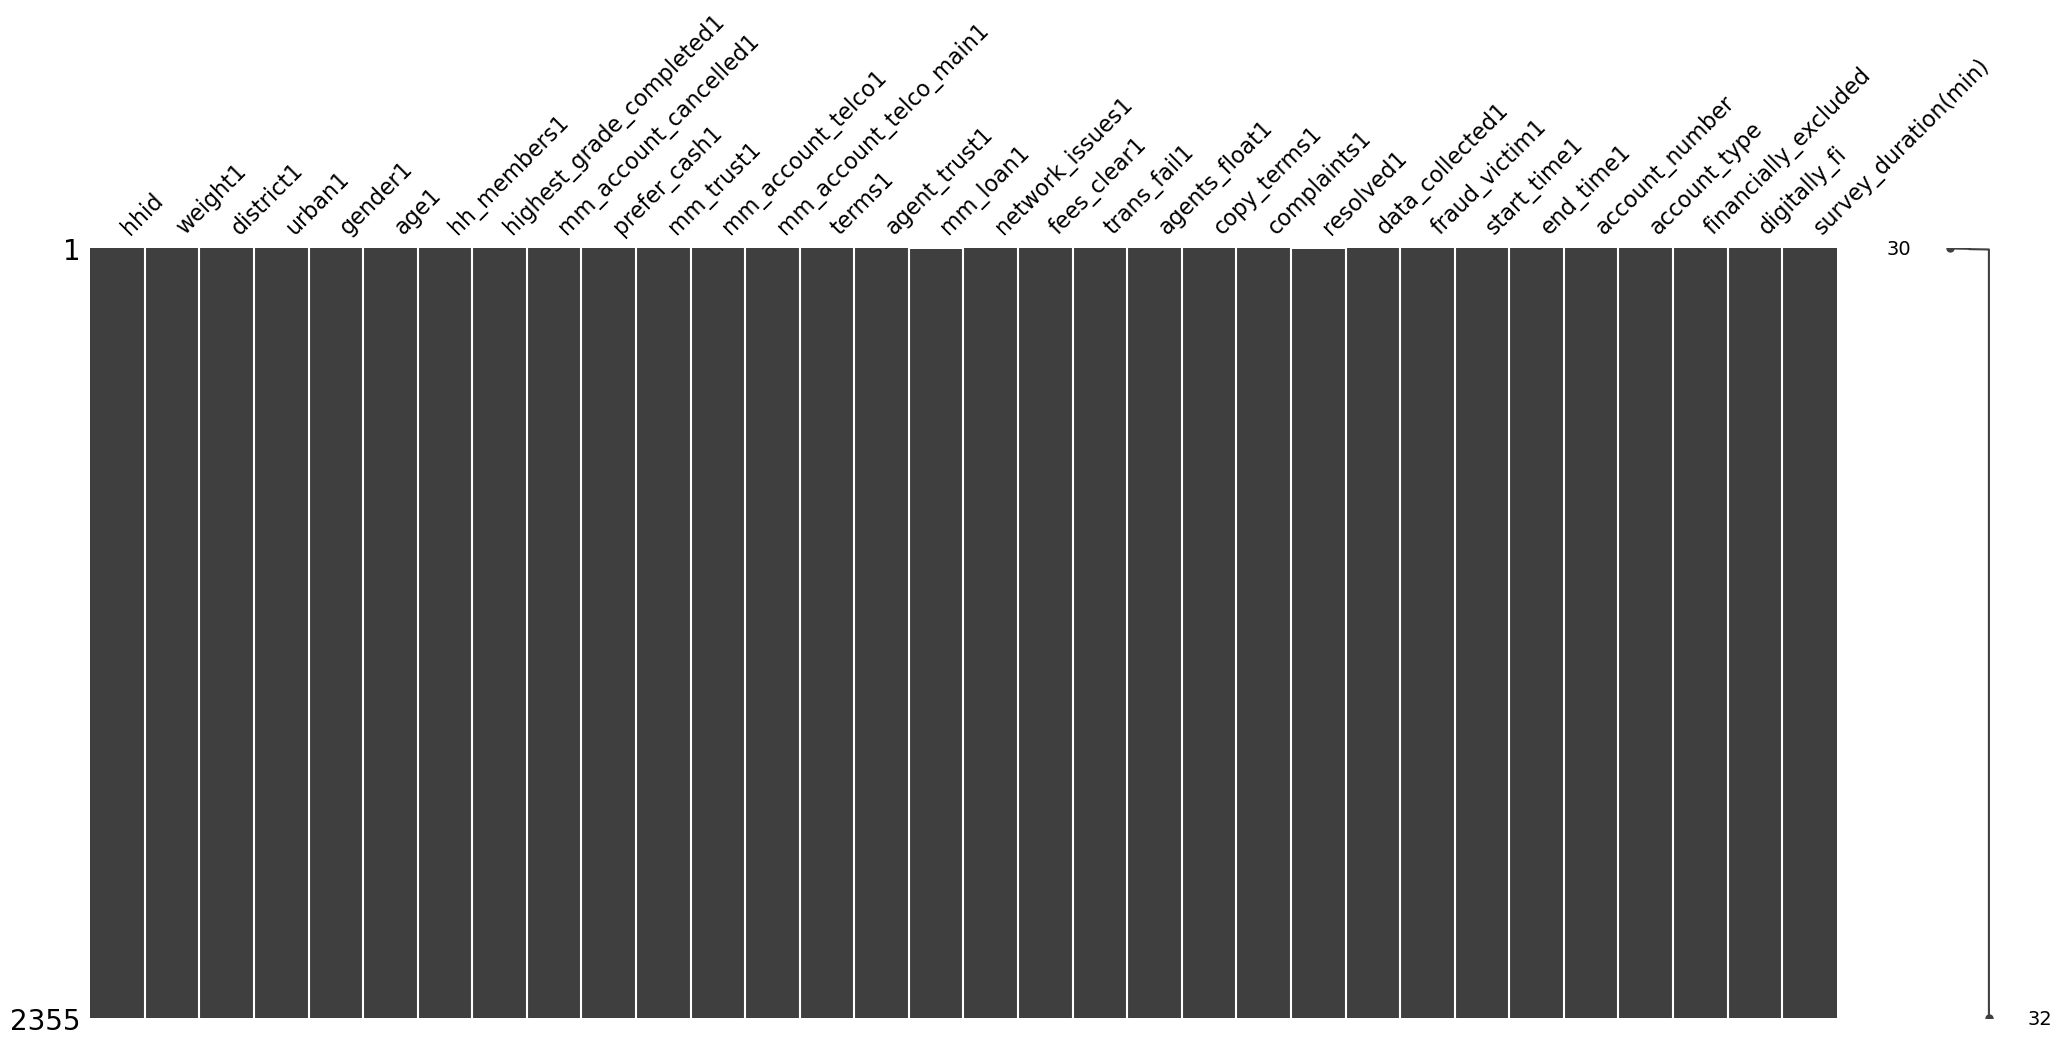

In [29]:
# visualize the missingness pattern using a matrix plot
msno.matrix(reshaped)

In [40]:
# After realizing that there is not missing pattern, I will use fill forward to remove null values
missing_cols = reshaped.columns[reshaped.isna().any()].tolist()
# fill missing values using forward fill
reshaped[missing_cols] = reshaped[missing_cols].fillna(method='ffill')
# Checking the missing values
reshaped.isnull().sum()

hhid                        0
weight1                     0
district1                   0
urban1                      0
gender1                     0
age1                        0
hh_members1                 0
highest_grade_completed1    0
mm_account_cancelled1       0
prefer_cash1                0
mm_trust1                   0
mm_account_telco1           0
mm_account_telco_main1      0
terms1                      0
agent_trust1                0
mm_loan1                    4
network_issues1             0
fees_clear1                 0
trans_fail1                 0
agents_float1               0
copy_terms1                 0
complaints1                 0
resolved1                   2
data_collected1             0
fraud_victim1               0
start_time1                 0
end_time1                   0
account_number              0
account_type                0
financially_excluded        0
digitally_fi                0
survey_duration(min)        0
dtype: int64

In [46]:
# Droping missing values in my dataset
reshaped.dropna(inplace=True)
# Checking for missing Value
reshaped.isnull().sum().all()

False

### 5. To aid the data team in drafting a data collection field plan, please extract a list of eligible households per district in .xlsx format, with each district on a separate worksheet.

The answer for this questions is in the excel called **laterite_households**

### References:

1. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney (2017)
2. StockOverflow
3. Data Transformations (WorldQuant University Data Science module)

================================END============================================